### About
- This notebook summarize the following datasets.
    - [NYU Depth Dataset V2](https://cs.nyu.edu/~silberman/datasets/nyu_depth_v2.html)

In [22]:
import os
import numpy as np
from pathlib import Path
import re
from imageio import imread
import shutil
import matplotlib.pyplot as plt

### Split samples
- 590 samples in total
    - 400 for training
    - 190 for validation

In [14]:
data_dir = Path('../../data/nyu_depth_v2_raw')
samples = os.listdir(data_dir)
print('Number of sampels: ', len(samples))

Number of sampels:  590


### Example room

In [10]:
sample = 'living_room_0044'
files = os.listdir(data_dir / sample)

pgms = [f for f in files if '.pgm' in f and 'd-' in f]
ppms = [f for f in files if '.ppm' in f and 'r-' in f]

print('number of pgms: ', len(pgms), 'number of ppms: ', len(ppms))

number of pgms:  445 number of ppms:  445


### Read .pgm images
- Reference
    - https://stackoverflow.com/questions/7368739/numpy-and-16-bit-pgm

In [11]:
def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))

### Depth image sample
- .pgm format
- filename with prefix d-

image shape:  (480, 640) image type:  <class 'numpy.ndarray'>


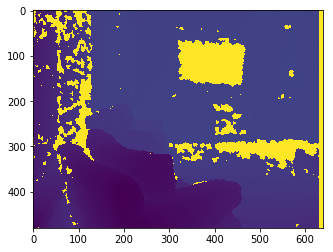

image shape:  (480, 640) image type:  <class 'numpy.ndarray'>


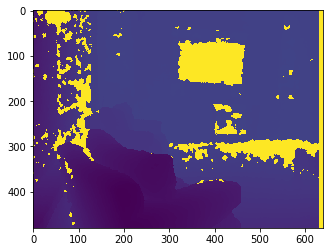

image shape:  (480, 640) image type:  <class 'numpy.ndarray'>


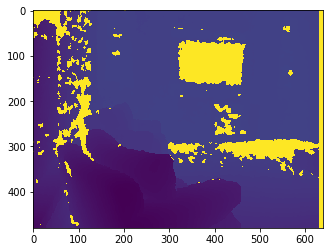

image shape:  (480, 640) image type:  <class 'numpy.ndarray'>


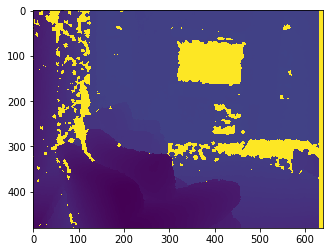

image shape:  (480, 640) image type:  <class 'numpy.ndarray'>


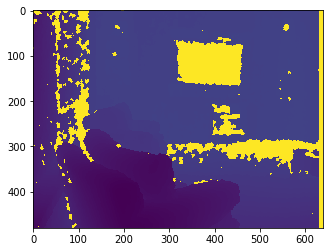

image shape:  (480, 640) image type:  <class 'numpy.ndarray'>


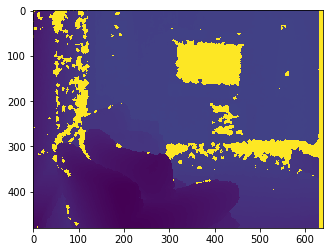

image shape:  (480, 640) image type:  <class 'numpy.ndarray'>


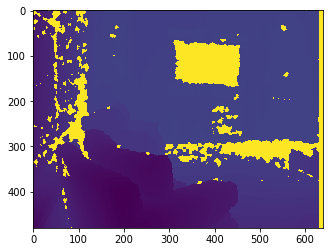

image shape:  (480, 640) image type:  <class 'numpy.ndarray'>


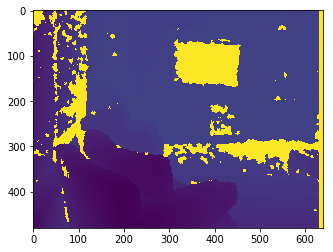

image shape:  (480, 640) image type:  <class 'numpy.ndarray'>


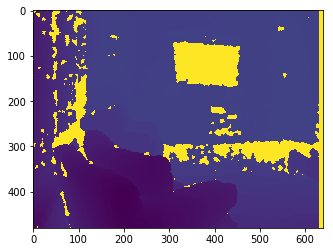

image shape:  (480, 640) image type:  <class 'numpy.ndarray'>


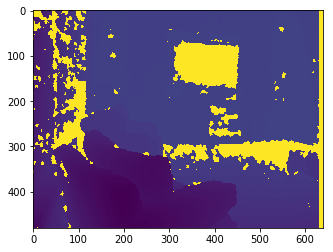

In [12]:
for pgm in pgms[-10:]:
    image = read_pgm(data_dir / sample / pgm, byteorder='<')
    print('image shape: ', image.shape, 'image type: ', type(image))
    plt.imshow(image)
    plt.show()

### RGB image sample
- .ppm format
- filename with prefix r-

image shape:  (480, 640, 3) image type:  <class 'imageio.core.util.Array'>


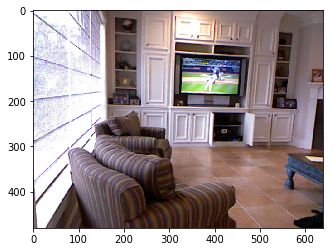

image shape:  (480, 640, 3) image type:  <class 'imageio.core.util.Array'>


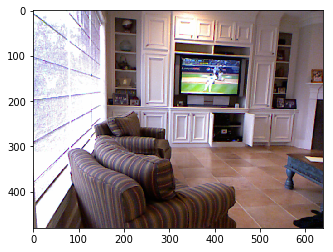

image shape:  (480, 640, 3) image type:  <class 'imageio.core.util.Array'>


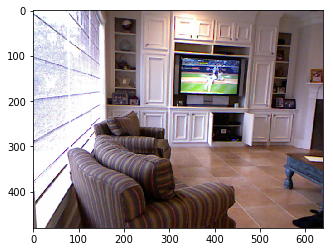

image shape:  (480, 640, 3) image type:  <class 'imageio.core.util.Array'>


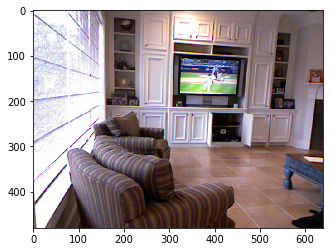

image shape:  (480, 640, 3) image type:  <class 'imageio.core.util.Array'>


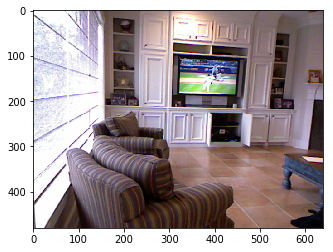

image shape:  (480, 640, 3) image type:  <class 'imageio.core.util.Array'>


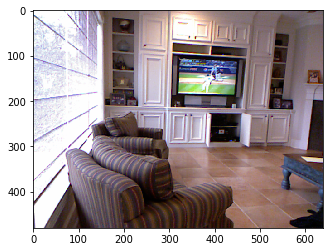

image shape:  (480, 640, 3) image type:  <class 'imageio.core.util.Array'>


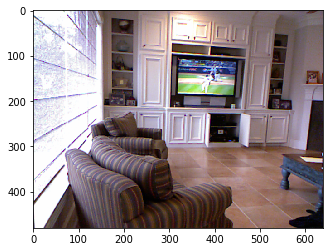

image shape:  (480, 640, 3) image type:  <class 'imageio.core.util.Array'>


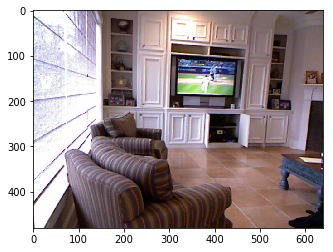

image shape:  (480, 640, 3) image type:  <class 'imageio.core.util.Array'>


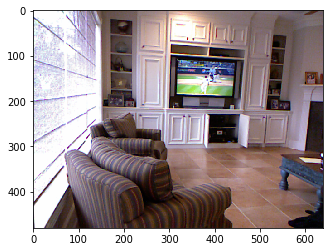

image shape:  (480, 640, 3) image type:  <class 'imageio.core.util.Array'>


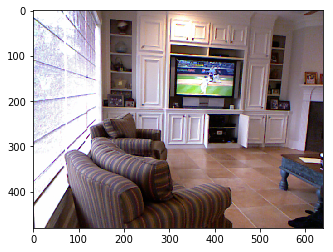

In [13]:
for ppm in ppms[-10:]:
    image = imread(data_dir / sample / ppm)
    print('image shape: ', image.shape, 'image type: ', type(image))
    plt.imshow(image)
    plt.show()

### Split train/valid data

In [27]:
train_rgb = Path('./data/train/rgb')
train_depth = Path('./data/train/depth')

valid_rgb = Path('./data/valid/rgb')
valid_depth = Path('./data/valid/depth')

if os.path.exists(train_rgb) or os.path.exists(train_depth):
    shutil.rmtree(train_rgb)
    shutil.rmtree(train_depth)
os.makedirs(train_rgb)
os.makedirs(train_depth)

if os.path.exists(valid_rgb) or os.path.exists(valid_depth):
    shutil.rmtree(valid_rgb)
    shutil.rmtree(valid_depth)
os.makedirs(valid_rgb)
os.makedirs(valid_depth)

In [31]:
num_train = 400
for i, s in enumerate(samples):    
    
    rgb_samples = [f for f in os.listdir(data_dir / s) if '.ppm' in f and 'r-' in f]
    depth_samples = [f for f in os.listdir(data_dir / s) if '.pgm' in f and 'd-' in f]
    
    if not rgb_samples or not depth_samples:
        print('Empty folder: ', i, s)
        continue
    else:
        rgb_sample, depth_sample = rgb_samples[0], depth_samples[0]
    
    if i < num_train:
        shutil.copyfile(data_dir / s / rgb_sample, train_rgb / '{}.ppm'.format(s))
        shutil.copyfile(data_dir / s / depth_sample, train_depth / '{}.pgm'.format(s))
    else:
        shutil.copyfile(data_dir / s / rgb_sample, valid_rgb / '{}.ppm'.format(s))
        shutil.copyfile(data_dir / s / depth_sample, valid_depth / '{}.pgm'.format(s))

print('finished')

Empty folder:  347 kitchen_0018a
Empty folder:  348 kitchen_0018b
Empty folder:  349 kitchen_0018c
Empty folder:  438 living_room_0023a
Empty folder:  439 living_room_0023b
Empty folder:  440 living_room_0024a
Empty folder:  441 living_room_0024b
Empty folder:  442 living_room_0024c
finished
